### Legend

**Дополнительно:**  
Во всех заданиях (кроме расчета среднего чека) можно пренебречь товарами, которые указаны в orders, но отсутствуют в products.

**Таблица products:**

product_id - id товара  
level1 - категория  
level2 - подкатегория  
name - наименование товара

**Таблица orders:**

order_id - номер чека  
accepted_at - дата и время чека  
product_id - id товара  
quantity - кол-во товара в чеке  
regular_price - регулярная цена  
price - текущая цена  
cost_price - закупочная цена

### Imports

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

### Таблица "Заказы"

In [153]:
orders=pd.read_excel('orders.xlsx')
orders

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45


### Таблица "Продукты"

In [154]:
products=pd.read_excel('products.xlsx')
products

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
...,...,...,...,...
40147,112937,Безалкогольные напитки,Напитки,Напиток Venom
40148,112997,Бакалея,Пряности,Приправа Adjika Family
40149,113057,Бакалея,Пряности,Соль Кулина
40150,113117,Кулинария,Готовые блюда,Салат Хлеб Насущный


### Inner Join

In [155]:
df=pd.merge(left=orders, right=products, on='product_id', how='inner')
df['ymd']=df['accepted_at'].dt.floor('D')
df

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,ymd
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13
...,...,...,...,...,...,...,...,...,...,...,...
3013,1517405750,2022-01-13 19:29:44,79337,2,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,2022-01-13
3014,1517676281,2022-01-13 08:21:53,79337,1,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,2022-01-13
3015,1517545392,2022-01-13 13:16:21,11897,1,513,513,392,Продукция для животных,Товары для кошек,Корм Perfect Fit,2022-01-13
3016,1517658904,2022-01-13 08:50:25,6392,2,79,79,45,Мучные кондитерские изделия,Хлебцы,Хлебцы Dr. Korner,2022-01-13


In [156]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3018 non-null   int64         
 1   accepted_at    3018 non-null   datetime64[us]
 2   product_id     3018 non-null   int64         
 3   quantity       3018 non-null   int64         
 4   regular_price  3018 non-null   int64         
 5   price          3018 non-null   int64         
 6   cost_price     3018 non-null   int64         
 7   level1         3018 non-null   str           
 8   level2         3018 non-null   str           
 9   name           3010 non-null   str           
 10  ymd            3018 non-null   datetime64[us]
dtypes: datetime64[us](2), int64(6), str(3)
memory usage: 259.5 KB


### Left JOIN (для среднего чека)

In [157]:
df0=pd.merge(left=orders, right=products, on='product_id', how='left')
df0['ymd']=df0['accepted_at'].dt.floor('D')
df0

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,ymd
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13
...,...,...,...,...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,2022-01-13
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,2022-01-13
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392,Продукция для животных,Товары для кошек,Корм Perfect Fit,2022-01-13
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45,Мучные кондитерские изделия,Хлебцы,Хлебцы Dr. Korner,2022-01-13


In [158]:
df0.info()

<class 'pandas.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[us]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
 7   level1         3018 non-null   str           
 8   level2         3018 non-null   str           
 9   name           3010 non-null   str           
 10  ymd            3323 non-null   datetime64[us]
dtypes: datetime64[us](2), int64(6), str(3)
memory usage: 285.7 KB


### Самая ходовая товарная группа (ТОП 10)

По какой категории товаров продано больше всего позиций?

- Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.  
- Дополнительно постройте на основании этой таблицы barchart.  
- Проверьте, чтобы все подписи на вашем графике выглядели читаемо и понятно. Этот график должен быть сходу понятен стороннему наблюдателю.  

In [159]:
df1=df.groupby('level1').agg(category_total_qty=('quantity','sum')).sort_values('category_total_qty', ascending=False)
df1.head(10)

,category_total_qty
level1,
Безалкогольные напитки,534
Молочная продукция,483
Свежие овощи,262
Кулинария,250
Бакалея,239
Хлеб и хлебобулочные изделия,218
Снэки,212
Свежие фрукты,184
Замороженная продукция,175


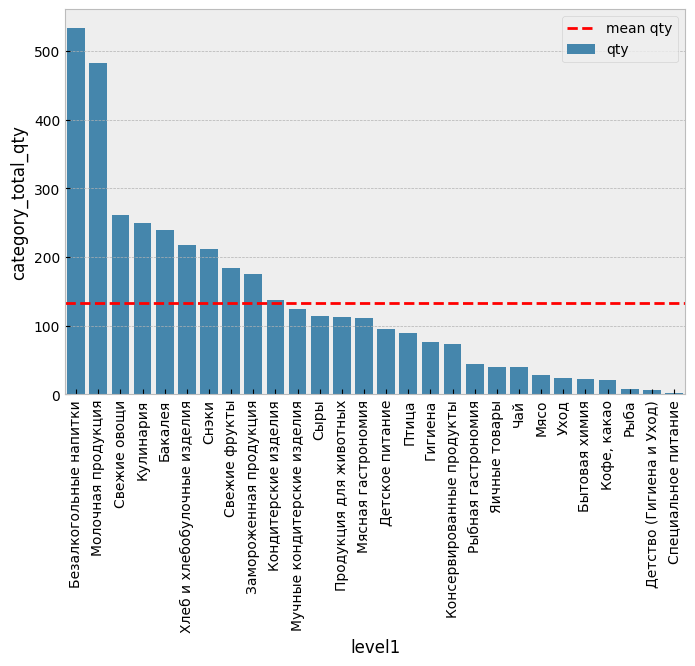

In [160]:
mean_qty=df1['category_total_qty'].mean()

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(data=df1, x='level1', y='category_total_qty', label='qty')
plt.xticks(rotation=90)
ax.axhline(y=mean_qty, linestyle='--', color='red', label='mean qty')
ax.legend();

### Распределение продаж по подкатегориям

- Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). 
- Проиллюстрируйте свой результат расчетной таблицей.

In [161]:
# df1=df.groupby(['level1', 'level2'], as_index=False).agg(subcategory_total_qty=('quantity','sum')).sort_values(by='subcategory_total_qty', ascending=False) # for check
df1=df.groupby(['level1', 'level2'], as_index=False).agg(subcategory_total_qty=('quantity','sum')).sort_values(by=['level1', 'subcategory_total_qty'], ascending=[True, False])
df1['proportion']=(df1['subcategory_total_qty']/df1.groupby('level1')['subcategory_total_qty'].transform('sum')).round(3)

with pd.option_context("display.max_rows", 150):
    display(df1.head(150))

,level1,level2,subcategory_total_qty,proportion
10,Бакалея,Сухие блюда быстрого приготовления,38,0.159
3,Бакалея,"Крупы, бобовые",30,0.126
1,Бакалея,Зерновые для завтраков,24,0.100
4,Бакалея,Макаронные изделия,24,0.100
9,Бакалея,Соусы,24,0.100
2,Бакалея,Ингредиенты для готовки,21,0.088
6,Бакалея,Пряности,21,0.088
5,Бакалея,Мука и мучные смеси,19,0.079
7,Бакалея,Растительные масла,18,0.075
8,Бакалея,Сахар,11,0.046


### Найти средний чек в заданную дату
Какой средний чек был 13.01.2022?

In [162]:
(
df0.query("ymd==@pd.Timestamp('2022-01-13')")
.assign(revenue=lambda g:g['price']*g['quantity'])
.groupby(['ymd','order_id'], as_index=False)['revenue']
.sum()
.groupby('ymd', as_index=False)['revenue']
.mean()
)


,ymd,revenue
0,2022-01-13,915.637868


### Доля промо в заданной категории
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.

Вам необходимо:
- Посчитать, какую долю от общих продаж категории Сыры занимают промо (в штуках)
- Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.

In [163]:
category='Сыры'

df1= (
df.query("level1 == @category")
.assign(group=lambda g: np.where(g['price']==g['regular_price'], 'regular', 'promo'))
.groupby('group', as_index=False)['quantity'].sum()
.assign(proportion=lambda g: (g['quantity']/g['quantity'].sum()).round(3))
)

df1

,group,quantity,proportion
0,promo,35,0.307
1,regular,79,0.693


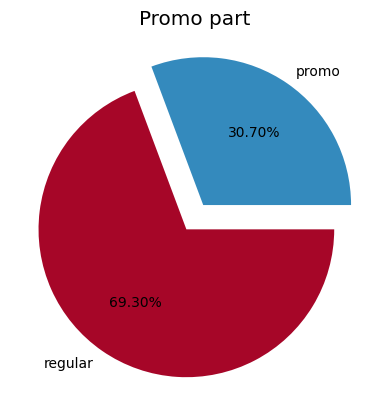

In [164]:
plt.pie(x=df1['proportion'], autopct='%.2f%%', labels=df1['group'], explode=[0.1]*len(df1));
plt.title('Promo part');

### Посчитать маржу по категориям
Нужно посчитать маржу:

- В рублях
- В %

Сделать это нужно по всем категориям level1 и отобразить с помощью 2 горизонтальных барчартов. Все подписи должны быть читаемыми и понятными.

In [165]:
margin= (
    df.assign(margin_rub=lambda g: g['quantity']*(g['price']-g['cost_price']), revenue=lambda g: g['quantity']*g['price'])
    .groupby('level1')[['margin_rub', 'revenue']].sum()
    .assign(margin_perc=lambda g: (g['margin_rub']/g['revenue']*100).round(1))[['margin_rub','margin_perc']]
    .reset_index()
)
margin

,level1,margin_rub,margin_perc
0,Бакалея,8177,37.6
1,Безалкогольные напитки,20373,44.2
2,Бытовая химия,1441,26.3
3,Гигиена,2971,29.5
4,Детское питание,1817,35.7
...,...,...,...
23,Сыры,7474,37.7
24,Уход,1099,26.3
25,Хлеб и хлебобулочные изделия,6251,42.5
26,Чай,2929,45.7


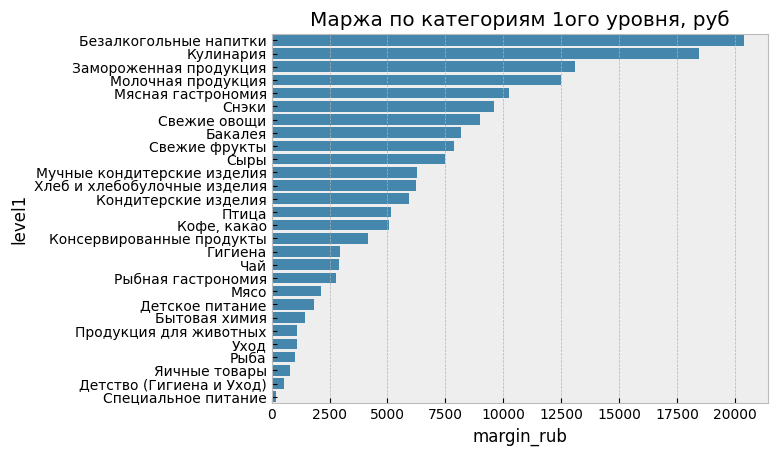

In [166]:
sns.barplot(data=margin.sort_values('margin_rub', ascending=False), y='level1', x='margin_rub')
plt.title('Маржа по категориям 1ого уровня, руб');

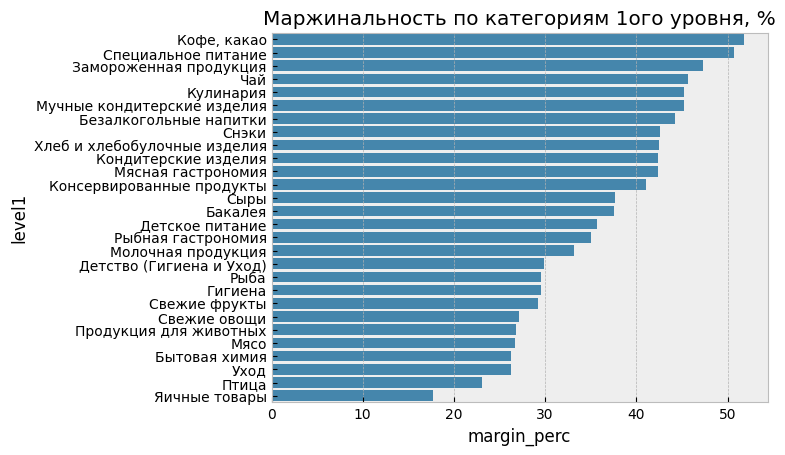

In [167]:
sns.barplot(data=margin.sort_values('margin_perc', ascending=False), y='level1', x='margin_perc')
plt.title('Маржинальность по категориям 1ого уровня, %');

### ABC анализ
- Сделайте ABC-анализ продаж по количеству
- Сделайте ABC-анализ по сумме продаж
- Сделайте новый столбец, в котором будет итоговая группа на основании двух анализов. Например: A C.

**Важно:**  
предлагаем провести ABC-анализ по подкатегориям, а не по отдельным товарам. Имеющихся у нас данных за небольшой период недостаточно для качественного анализа на уровне товаров. К тому же, количество товаров слишком велико, что может также исказить результаты. А ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

#### Сделаем группировку по подкатегориям для выполнения условия "провести ABC-анализ по подкатегориям"

In [168]:
df1=(df.assign(revenue=lambda g: g['price']*g['quantity'])
     .groupby('level2')[['quantity', 'revenue']]
     .sum()    
)
df1

,quantity,revenue
level2,,
"Бананы, косточковые и прочие плоды",76,10191
Бараночные и сухарные изделия,8,460
Бритье,3,731
Бумажная продукция,42,4569
Влажные салфетки,2,255
...,...,...
Чайные напитки,7,1349
Черный чай,26,3890
Шоколад,29,4265


#### Проведем ABC анализ единой цепочкой

In [169]:
a_lim, b_lim=0.8, 0.95
abc_markers=['A','B']

abc=(df1
            .sort_values(by='quantity',ascending=False)
            .assign(perc_cumsum_qty= lambda d: (d['quantity']/d['quantity'].sum()).cumsum())
            .assign(abc_quantity=lambda d: np.select([d['perc_cumsum_qty']<=a_lim, d['perc_cumsum_qty']<=b_lim],abc_markers , default='C'))

            .sort_values(by='revenue',ascending=False)
            .assign(perc_cumsum_rev= lambda d: (d['revenue']/d['revenue'].sum()).cumsum())
            .assign(abc_revenue=lambda d: np.select([d['perc_cumsum_rev']<=a_lim, d['perc_cumsum_rev']<=b_lim],abc_markers , default='C'))

            .assign(cross_abc=lambda d: d['abc_quantity']+d['abc_revenue'])
            .sort_values('cross_abc')[['quantity', 'abc_quantity', 'abc_revenue', 'cross_abc']]
            # .sort_values('quantity', ascending=False)[['quantity', 'abc_quantity', 'abc_revenue', 'cross_abc']] # for checking
)

with pd.option_context("display.max_rows", 150):
    display(abc.head(150))

,quantity,abc_quantity,abc_revenue,cross_abc
level2,,,,
Готовые блюда,248,A,A,AA
Бумажная продукция,42,A,A,AA
Современные кондитерские изделия,82,A,A,AA
Молочно-десертные продукты,116,A,A,AA
Мороженое,61,A,A,AA
Мягкие сыры,46,A,A,AA
Кисломолочные традиционные продукты,106,A,A,AA
Воды питьевые,162,A,A,AA
Соковая продукция,82,A,A,AA
